In [133]:
# this notebook explores the hourly time series data for etherium between 2017 and 2020
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
# read csv into DataFrame
# try lambda function to parse as data is read in
d_parser = lambda x: pd.to_datetime(x, format='%Y-%m-%d %I-%p')
df = pd.read_csv('ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser)

In [102]:
# examine first five rows of data
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [103]:
# check dimensions of DataFrame
df.shape

(23674, 7)

In [104]:
# # previous steps below, not required since data parser implemented while reading csv into DataFrame
# # attempt datetime method
# df.loc[0, 'Date'].day_name() # AttributeError, method cannot parse
# # convert 'Date' column to datetime; parse datetime with proper string format
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')
# # check formatting of 'Date'
# df['Date']

In [105]:
# reattempt datetime method
df.loc[0, 'Date'].day_name()

'Friday'

In [106]:
# add day of week column using dt class method on series object (date)
df['DayOfWeek'] = df['Date'].dt.day_name()

In [107]:
print('Earliest date:', df['Date'].min())
print('Latest date:', df['Date'].max())

Earliest date: 2017-07-01 11:00:00
Latest date: 2020-03-13 20:00:00


In [108]:
# timedelta
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

In [109]:
# Filtering by date
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99,Tuesday


In [110]:
# set index as date
df.set_index('Date', inplace=True)

In [111]:
df

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92,Friday
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71,Friday
...,...,...,...,...,...,...,...
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55,Saturday
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85,Saturday
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99,Saturday


In [112]:
df.loc['2019']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91,Tuesday
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02,Tuesday
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69,Tuesday
2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38,Tuesday
2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84,Tuesday
...,...,...,...,...,...,...,...
2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37,Tuesday
2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63,Tuesday
2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43,Tuesday


In [113]:
# using slices
df['2020-01':'2020-02']

,Symbol,Open,High,Low,Close,Volume,DayOfWeek
Date,,,,,,,
2020-02-29 23:00:00,ETHUSD,223.35,223.58,216.83,217.31,1927939.88,Saturday
2020-02-29 22:00:00,ETHUSD,223.48,223.59,222.14,223.35,535998.57,Saturday
2020-02-29 21:00:00,ETHUSD,224.63,225.14,222.74,223.48,561158.03,Saturday
2020-02-29 20:00:00,ETHUSD,225.31,225.33,223.50,224.63,511648.65,Saturday
2020-02-29 19:00:00,ETHUSD,225.09,225.85,223.87,225.31,1250856.20,Saturday
...,...,...,...,...,...,...,...
2020-01-01 04:00:00,ETHUSD,129.57,130.00,129.50,129.56,702786.82,Wednesday
2020-01-01 03:00:00,ETHUSD,130.37,130.44,129.38,129.57,496704.23,Wednesday
2020-01-01 02:00:00,ETHUSD,130.14,130.50,129.91,130.37,396315.72,Wednesday


In [115]:
# access close series hourly mean for specified period; average hourly closing price within time frame
df['2020-01':'2020-02']['Close'].mean()

195.16559027777814

In [120]:
# find high value for the specified day
df.loc['2020-01-01']['High'].max() # 132.68

132.68

In [123]:
# resampling series on daily basis to find max value for each day
highs = df['High'].resample('D').max()
# since resample, have highs for every single day
highs['2020-01-01'] # 132.68, same as cell above

132.68

In [ ]:
# line magic to display graphs in notebook
%matplotlib inline

<AxesSubplot:xlabel='Date'>

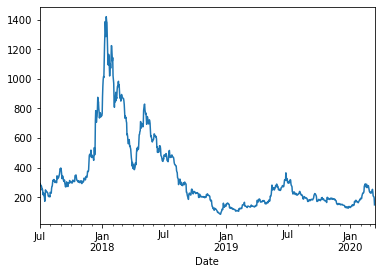

In [125]:
highs.plot()

In [127]:
# resample entire df, weekly basis, key=feature, value = aggregation function applied to key
weeklies = df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'})

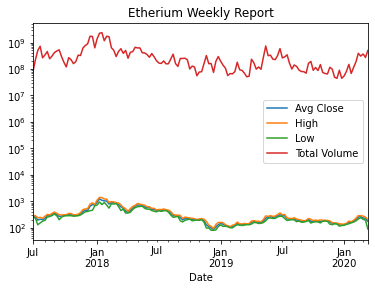

In [136]:
weeklies.plot(logy=True, title='Etherium Weekly Report') # semi-log to prevent huge spike in plot due to 'Volume'
plt.legend(["Avg Close","High", "Low", "Total Volume"])